In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

shape of movies.csv


In [3]:
movies_df = pd.read_csv("movies.csv")
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Shape of ratings.csv


In [4]:
ratings_df = pd.read_csv("ratings.csv")
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


How many unique "userId" are available in "ratings.csv"?

In [5]:
len(ratings_df["userId"].unique())

610

Which movie has recieved maximum number of user ratings?


In [7]:
ratings_count = ratings_df["movieId"].value_counts()
print("Movie with the maximum number of user ratings:")
print("MovieId:", ratings_count.idxmax())
print("Title:", ratings_count.max())

Movie with the maximum number of user ratings:
MovieId: 356
Title: 329


# Select all the correct tags submitted by users to "Matrix, The (1999)" movie

In [8]:
matrix_movieId = movies_df[
    movies_df["title"].str.contains("Matrix, The \(1999\)", regex=True)
]["movieId"].iloc[0]
tags_df = pd.read_csv("tags.csv", encoding="utf-8")
matrix_tags = tags_df[tags_df["movieId"] == matrix_movieId]["tag"].unique()
print("Tags for The Matrix (1999):")
print(matrix_tags)

Tags for The Matrix (1999):
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [9]:
terminator_movieId = movies_df[
    movies_df["title"] == "Terminator 2: Judgment Day (1991)"
]["movieId"].iloc[0]
terminator_avg_rating = ratings_df[ratings_df["movieId"] == terminator_movieId][
    "rating"
].mean()
print("Average user rating for Terminator 2: Judgment Day (1991):")
print(terminator_avg_rating)

Average user rating for Terminator 2: Judgment Day (1991):
3.970982142857143


# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

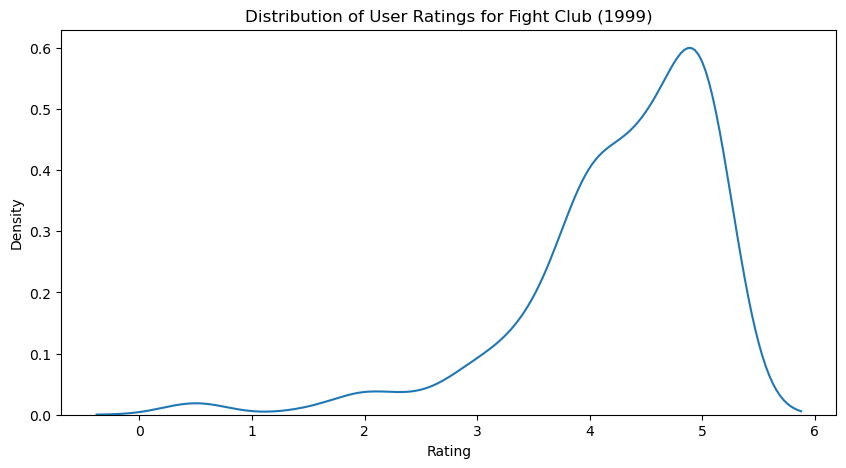

In [10]:
fight_club_movieId = movies_df[movies_df["title"] == "Fight Club (1999)"][
    "movieId"
].iloc[0]
fight_club_ratings = ratings_df[ratings_df["movieId"] == fight_club_movieId]["rating"]
plt.figure(figsize=(10, 5))
sns.kdeplot(fight_club_ratings)
plt.title("Distribution of User Ratings for Fight Club (1999)")
plt.xlabel("Rating")
plt.ylabel("Density")
plt.show()

In [11]:
ratings_count = ratings_df.groupby("movieId").size()
ratings_count

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Length: 9724, dtype: int64

In [12]:
movies_with_100plus_ratings = ratings_count[ratings_count >= 100].index


In [13]:
average_ratings_100plus = (
    ratings_df[ratings_df["movieId"].isin(movies_with_100plus_ratings)]
    .groupby("movieId")["rating"]
    .mean()
)

In [14]:
most_popular_by_avg_rating_100plus = average_ratings_100plus.idxmax()
most_popular_movie_title_100plus = movies_df[
    movies_df["movieId"] == most_popular_by_avg_rating_100plus
]["title"].iloc[0]

# Which movie is the most popular based on  average user ratings?
*

In [15]:
most_popular_movie_title_100plus

'Shawshank Redemption, The (1994)'

# Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [16]:
top_movies_by_user_ratings = ratings_df["movieId"].value_counts().head(5).index.tolist()
top_movies_titles = movies_df[movies_df["movieId"].isin(top_movies_by_user_ratings)][
    "title"
].tolist()
top_movies_titles

['Pulp Fiction (1994)',
 'Shawshank Redemption, The (1994)',
 'Forrest Gump (1994)',
 'Silence of the Lambs, The (1991)',
 'Matrix, The (1999)']

# Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [18]:
sci_fi_movies = movies_df[movies_df["genres"].str.contains("Sci-Fi")]
sci_fi_movie_ratings = ratings_df[ratings_df["movieId"].isin(sci_fi_movies["movieId"])][
    "movieId"
].value_counts()
third_most_popular_sci_fi_movie_id = sci_fi_movie_ratings.index[2]
third_most_popular_sci_fi_movie_title = movies_df[
    movies_df["movieId"] == third_most_popular_sci_fi_movie_id
]["title"].iloc[0]
third_most_popular_sci_fi_movie_title

'Jurassic Park (1993)'

# Mention the movieId of the movie which has the highest IMDB rating.

In [22]:
links_df = pd.read_csv("links.csv")

In [23]:
merged_ratings_imdb = average_ratings_100plus.reset_index().merge(
    links_df, on="movieId"
)
highest_imdb_rating = merged_ratings_imdb["rating"].max()
highest_imdb_movieId = merged_ratings_imdb[
    merged_ratings_imdb["rating"] == highest_imdb_rating
]["movieId"].iloc[0]
highest_imdb_movieId
movies_df[movies_df["movieId"] == 318]

,movieId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama


# Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [24]:
df_sci_fi_movies = movies_df[movies_df["genres"].str.contains("Sci-Fi")]
df_sci_fi_ratings = df_sci_fi_movies.merge(
    average_ratings_100plus.reset_index(), on="movieId"
)
highest_rated_sci_fi_movie = df_sci_fi_ratings[
    df_sci_fi_ratings["rating"] == df_sci_fi_ratings["rating"].max()
]
highest_rated_sci_fi_movie[["movieId", "title", "rating"]]

,movieId,title,rating
2,260,Star Wars: Episode IV - A New Hope (1977),4.231076
